History length: 50


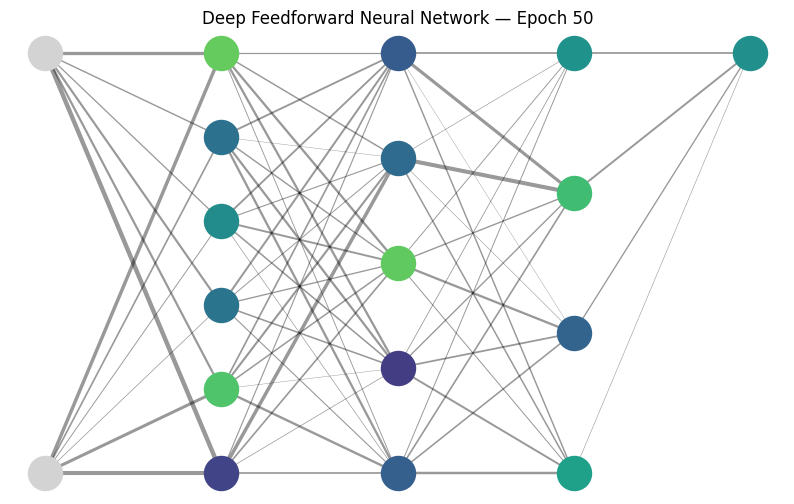

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# --------------------------------------------------
# Setup
# --------------------------------------------------
os.makedirs("gifs", exist_ok=True)
np.random.seed(1)

# --------------------------------------------------
# Activation functions
# --------------------------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(a):
    return a * (1 - a)

# --------------------------------------------------
# Dataset (XOR-style)
# --------------------------------------------------
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y = np.array([[0], [1], [1], [0]])

# --------------------------------------------------
# Network architecture (DEEP)
# --------------------------------------------------
layers = [2, 6, 5, 4, 1]   # 👈 deeper network
L = len(layers) - 1

# Initialize weights & biases
W = [np.random.randn(layers[i], layers[i+1]) * 0.8 for i in range(L)]
b = [np.zeros((1, layers[i+1])) for i in range(L)]

lr = 0.8
epochs = 50

# --------------------------------------------------
# Training + history
# --------------------------------------------------
history = []

for _ in range(epochs):
    activations = [X]

    # Forward pass
    for i in range(L):
        z = activations[-1] @ W[i] + b[i]
        a = sigmoid(z)
        activations.append(a)

    # Save mean activations + weights
    history.append((
        [a.mean(axis=0) for a in activations[1:]],
        [Wi.copy() for Wi in W]
    ))

    # Backpropagation
    delta = activations[-1] - y
    for i in reversed(range(L)):
        dW = activations[i].T @ delta
        db = delta.mean(axis=0)

        W[i] -= lr * dW
        b[i] -= lr * db

        if i > 0:
            delta = (delta @ W[i].T) * sigmoid_deriv(activations[i])

print("History length:", len(history))  # MUST be > 0

# --------------------------------------------------
# Visualization layout
# --------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis("off")

# Node positions
node_pos = []
for i, n in enumerate(layers):
    ys = np.linspace(0.8, 0.2, n)
    xs = np.full(n, i)
    node_pos.append(list(zip(xs, ys)))

# Draw nodes
nodes = []
for layer in node_pos:
    layer_nodes = []
    for x, y_ in layer:
        s = ax.scatter(x, y_, s=600, c="lightgray", zorder=3)
        layer_nodes.append(s)
    nodes.append(layer_nodes)

# Draw edges
edges = []
for i in range(len(node_pos) - 1):
    for p1 in node_pos[i]:
        for p2 in node_pos[i+1]:
            line, = ax.plot(
                [p1[0], p2[0]],
                [p1[1], p2[1]],
                lw=0.5,
                color="black",
                alpha=0.4
            )
            edges.append(line)

# --------------------------------------------------
# Animation functions
# --------------------------------------------------
def init():
    for layer in nodes:
        for n in layer:
            n.set_color("lightgray")
    for e in edges:
        e.set_linewidth(0.5)
    ax.set_title("Deep Feedforward Neural Network — Epoch 0")
    return sum(nodes, []) + edges

def update(epoch):
    acts, weights = history[epoch]

    # Update node colors
    for l in range(1, len(layers)):
        for j, node in enumerate(nodes[l]):
            node.set_color(plt.cm.viridis(acts[l-1][j]))

    # Update edge widths
    idx = 0
    for l in range(len(weights)):
        Wl = weights[l]
        for i in range(Wl.shape[0]):
            for j in range(Wl.shape[1]):
                edges[idx].set_linewidth(abs(Wl[i, j]) * 1.5 + 0.3)
                idx += 1

    ax.set_title(f"Deep Feedforward Neural Network — Epoch {epoch+1}")
    return sum(nodes, []) + edges

# --------------------------------------------------
# Animation (SAFE CONFIG)
# --------------------------------------------------
ani = FuncAnimation(
    fig,
    update,
    frames=len(history),
    init_func=init,
    interval=350,
    blit=False
)

# 🔥 FORCE FIRST FRAME (MATPLOTLIB BUG FIX)
init()
update(0)
fig.canvas.draw()

# Save GIF
ani.save("gifs/deep_feedforward_nn_v2.gif", writer="pillow")

plt.show()
